<ipython-input-5-e0ce6525b95a>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill as a simple example


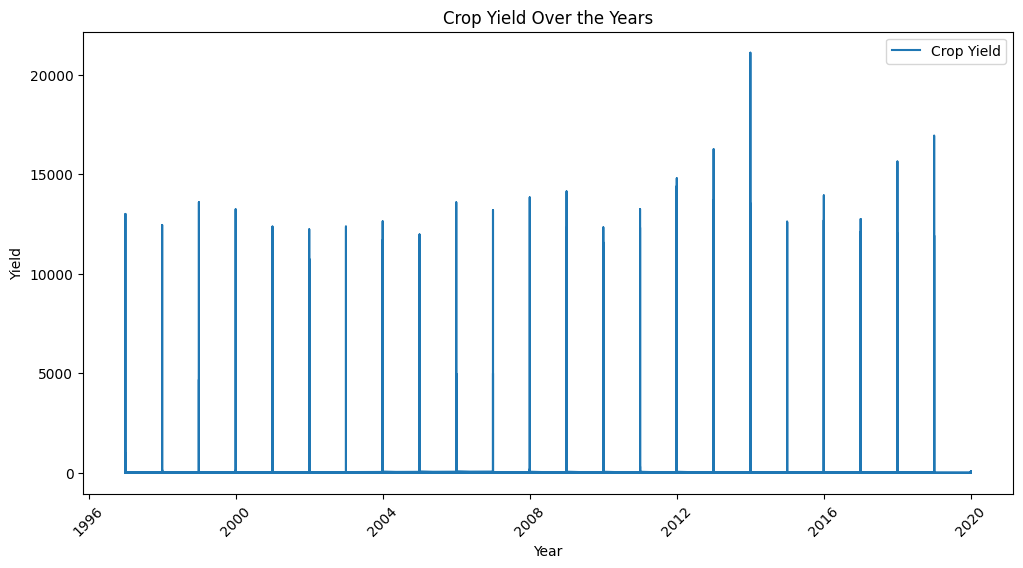

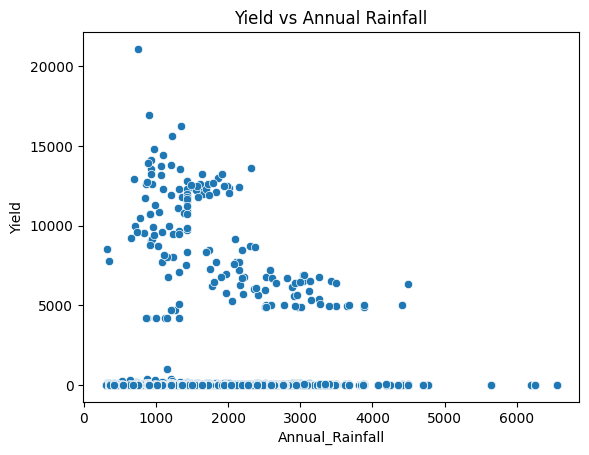

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Root Mean Squared Error (RMSE): 3.1426804376574786


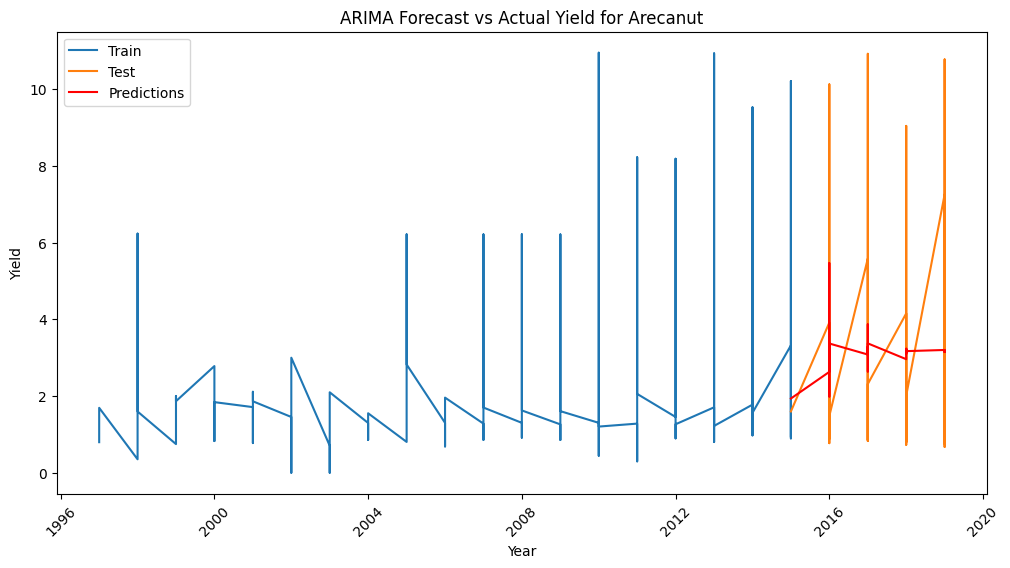

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Step 1: Load the Data
data = pd.read_csv('/content/crop_yield.csv')

# Step 2: Data Preprocessing

# Convert 'Crop_Year' to datetime
data['Crop_Year'] = pd.to_datetime(data['Crop_Year'], format='%Y')

# Handle missing values (if any)
data.fillna(method='ffill', inplace=True)  # Forward fill as a simple example

# Feature Engineering (if required)
# Example: you may want to encode categorical features like 'Season' and 'State' using one-hot encoding
data = pd.get_dummies(data, columns=['Season', 'State'], drop_first=True)

# Step 3: Visualization

# Plotting crop yield over the years
plt.figure(figsize=(12, 6))
plt.plot(data['Crop_Year'], data['Yield'], label='Crop Yield')
plt.title('Crop Yield Over the Years')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# If you want to see the relationship between yield and other features like rainfall
sns.scatterplot(x=data['Annual_Rainfall'], y=data['Yield'])
plt.title('Yield vs Annual Rainfall')
plt.show()

# Step 4: Time Series Analysis (ARIMA Model)

# Filter data for a specific crop (for example, Arecanut)
arecanut_data = data[data['Crop'] == 'Arecanut']

# Set 'Crop_Year' as index for time series analysis
arecanut_data.set_index('Crop_Year', inplace=True)

# We’ll focus on the 'Yield' column to forecast yield over time
arecanut_data = arecanut_data[['Yield']]

# Split data into train and test sets
train_size = int(len(arecanut_data) * 0.8)
train, test = arecanut_data[:train_size], arecanut_data[train_size:]

# Fit an ARIMA model (you can tune the parameters for better results)
model = ARIMA(train, order=(5, 1, 0))  # Adjust order based on your analysis
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(steps=len(test))

# Evaluate the model performance (RMSE)
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Step 5: Plotting the Predictions vs Actual values

plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Yield'], label='Train')
plt.plot(test.index, test['Yield'], label='Test')
plt.plot(test.index, predictions, label='Predictions', color='red')
plt.legend(loc='best')
plt.title('ARIMA Forecast vs Actual Yield for Arecanut')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.xticks(rotation=45)
plt.show()

# Optional: You can save the predictions to a CSV for further analysis
# predicted_data = pd.DataFrame({'Year': test.index, 'Actual Yield': test['Yield'], 'Predicted Yield': predictions})
# predicted_data.to_csv('arecanut_yield_predictions.csv', index=False)
